In [1]:
import tensorflow
tensorflow.__version__

'2.18.0'

In [3]:
import numpy as np
import zipfile
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# MINST 0-9

In [6]:
from tensorflow.keras.datasets import mnist

In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [10]:
## 60,000 image for training
## 10,000 images for testing
## 28*28 --> 28 rows and 28 column
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
28*28

784

In [14]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [16]:
# first image - range 0-255, 
# closer to 0 the darker the image, closer to 255 the lighter the image
# RGB image
print(train_data[0].shape)
train_data[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
train_labels[0]

np.uint8(5)

# Concatenate the data
- hstack - vertically concatenate
- hstack - horizonally concatenate

In [21]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [25]:
# row of feacture vector, want to add more rows 
digit_data = np.vstack([train_data, test_data])

# 1D label arrays - want to extend the label list
digit_labels = np.hstack([train_labels, test_labels])

In [27]:
print(digit_data.shape)
print(digit_labels.shape)

(70000, 28, 28)
(70000,)


# Virtualize the image

In [30]:
# Ramdom index
index = np.random.randint(0,digit_data.shape[0])
index

32902

Text(0.5, 1.0, 'Class : 5')

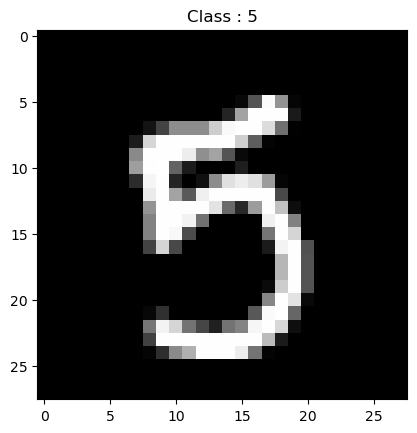

In [32]:
plt.imshow(digit_data[index], cmap = "gray")
plt.title("Class : " + str(digit_labels[index]))

<Axes: ylabel='count'>

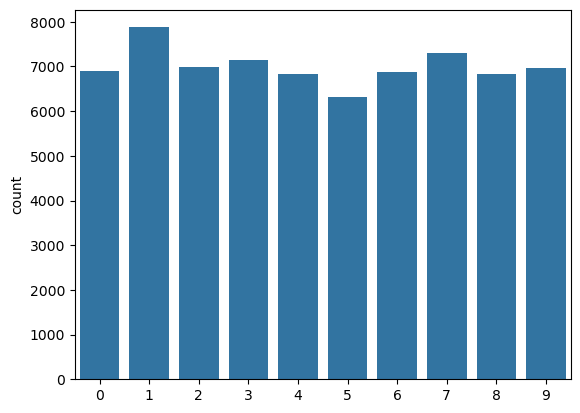

In [34]:
# Count how many images per class
sns.countplot(x=digit_labels)

# Kaggle A-Z

In [37]:
!curl -O "https://iaexpert.academy/arquivos/alfabeto_A-Z.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184M  100  184M    0     0  26.4M      0  0:00:06  0:00:06 --:--:-- 27.2M


In [38]:
zip_object = zipfile.ZipFile(file = "/Users/tinthuzaraye/Documents/Optical_Character_Recognication/Training_the_Neural_Network/alfabeto_A-Z.zip", mode = "r")
zip_object.extractall("./")
zip_object.close()

In [40]:
dataset_az = pd.read_csv("/Users/tinthuzaraye/Documents/Optical_Character_Recognication/Training_the_Neural_Network/A_Z Handwritten Data.csv")
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
## Machine learning models expect floating point value 
# so we need to convert to float value 
dataset_az = pd.read_csv("/Users/tinthuzaraye/Documents/Optical_Character_Recognication/Training_the_Neural_Network/A_Z Handwritten Data.csv").astype("float32")
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# The first colum is label and the rest are the class
# so drop the first colum for the data
alphabet_data = dataset_az.drop("0", axis = 1)
alphabet_labels = dataset_az["0"]

In [45]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [49]:
alphabet_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# 0-25 because there are 26 letters in alphabet
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [53]:
28*28

784

# Reshape the alphabet_data

In [56]:
# need to reshape the alphabet_data to match with MNIST dataset 
## becuase it is the vector format (372450, 784) --> (372450,28,28)
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0],28,28))
alphabet_data.shape

(372450, 28, 28)

In [58]:
index = np.random.randint(0, alphabet_data.shape[0])
index

324132

Text(0.5, 1.0, 'Class : 20.0')

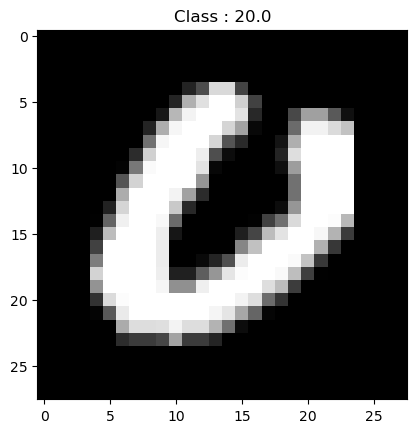

In [60]:
plt.imshow(alphabet_data[index], cmap = "gray")
plt.title("Class : " + str(alphabet_labels[index]))

Text(0, 0.5, 'Count')

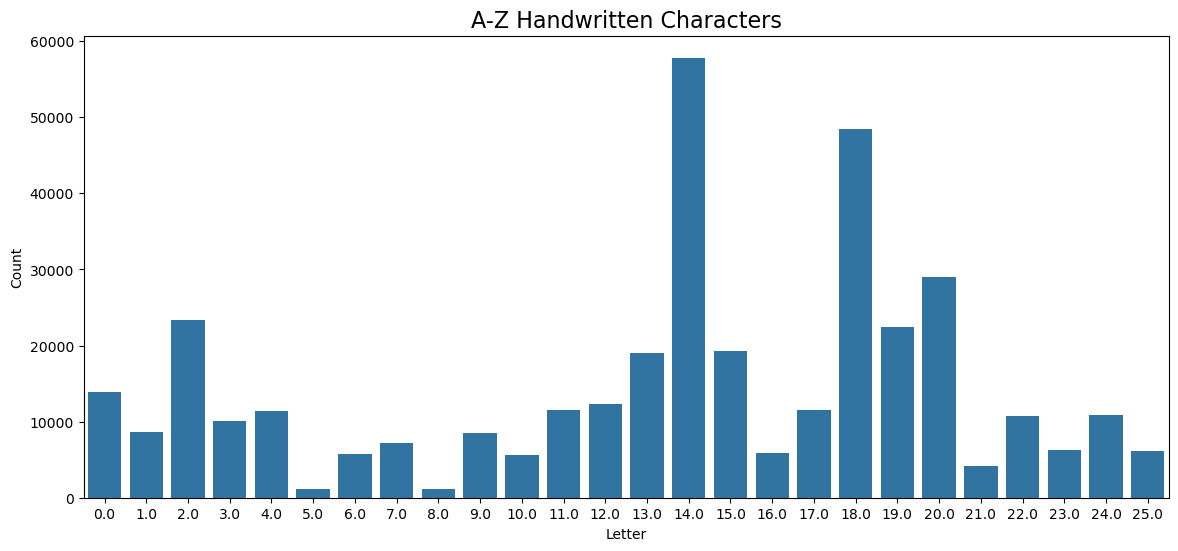

In [62]:
plt.figure(figsize = (14,6))
sns.countplot(x = alphabet_labels)
plt.title("A-Z Handwritten Characters", fontsize = 16)
plt.xlabel("Letter")
plt.ylabel("Count")

# Joining the Dataset

In [65]:
# digit 0-9
digit_labels, np.unique(digit_labels)

(array([5, 0, 4, ..., 4, 5, 6], shape=(70000,), dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [67]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [69]:
## Both digit_labels and alphabet_labels has 0-9, so change the alphabet_labels to start from 10 
# becasue when we combine the data we can not have same label 
# before 0 --> A, 1 --> B
# change 10 --> A, 11 --> B
alphabet_labels += 10
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [71]:
data = np.vstack([alphabet_data, digit_data])
labels = np.hstack([alphabet_labels, digit_labels])

In [73]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [75]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

# add new dimension 
### Because CNNs expect images to have a channel dimension

In [78]:
data = np.array(data, dtype = "float32")
data.shape

(442450, 28, 28)

In [80]:
data = np.expand_dims(data, axis = -1)
data.shape

(442450, 28, 28, 1)

# Pre-processing the data

In [83]:
data[0].min(), data[0].max()

(np.float32(0.0), np.float32(255.0))

In [85]:
# if we send the data to range 0-255, neural network will take longer time and model perform not good
# So we need to normalize the data
# Neural network best with 0-1
data[0] /= 255.0

In [87]:
# the range become 0-1
data[0].min(), data[0].max()

(np.float32(0.0), np.float32(1.0))

In [89]:
# Check the label
np.unique(labels), len(np.unique(labels))

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

## LabelBinarizer() 
- convert class labels (like digits or letters) into a format that a neural network can understand
#### it is type of onehotencoder

##### eg
- A B C
- 0 1 2

#### onehotencoder
- A B C
- 1 0 0
- 0 1 0
- 0 0 1

In [92]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [94]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(442450, 36))

In [96]:
np.unique(labels)

array([0, 1])

In [98]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

In [100]:
index = np.random.randint(0,data.shape[0])
index

216176

Text(0.5, 1.0, 'Calss : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]')

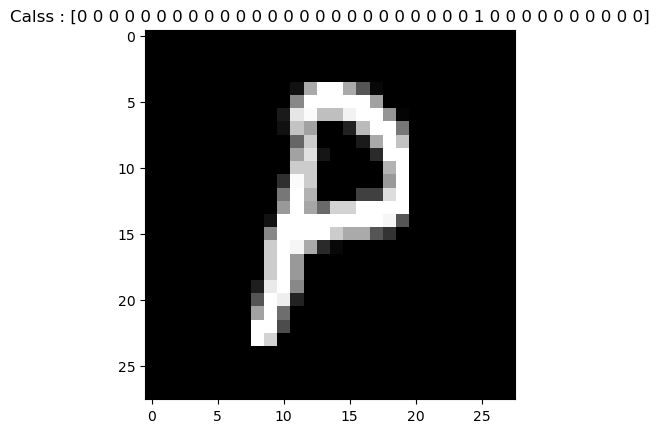

In [102]:
plt.imshow(data[index], cmap = "gray")
plt.title("Calss : " + str(labels[index]))

### Calculate the total count per class

In [105]:
class_total = labels.sum(axis = 0)
class_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

#### This dataset is unbalanced and the max is a lot higher than other class
#### so the algorithm will not learn so well

In [108]:
## max class
class_total.max()

np.int64(57825)

## Convert the label to weight


In [111]:
## Since the dataset is imbalanced , we need to do the weight for each class
## weight tell the neural network - rare classes are more important
## a class has many samples, its weights is small ----> lower penalty
## a class has few samples, its weight is larger ---> higher penalty

class_weight = {}
for i in range(len(class_total)) :
    class_weight[i] = float(class_total.max() / class_total[i])

In [113]:
class_weight

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

## Split the data to Train and Test

In [116]:
# 80% train and 20% test
# will get different train and test dataset everytime when we run the notebook
# setting random_state = 1 to ensure that - 
## - same shuffle everytime
## - same train/test data each run
## - reproductible experiments 
## - consistent accuracy result

# Stratify = labels ---> very important when training a classifier for digit + A-Z letter
# without stratify 
## - training might get too many samples of common classes
## - test set might miss rare classes
## - results become misleading
## - accuracy might look high but it actually biased
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [117]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [118]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [120]:
# ImageDataGenerator - it creates new, slightly modified version of the training images, so the model can learn better and generalized well.
#                    - it prevents overfitting and teaches the models to recognize characters even when rotated, shift or zoomed

# rotation_range = 10 ----> image can randomly roated between -10 and +10
# zoom_range = 0.5 ----> random zoom in or out 5%
# width_shift = 0.1 ----> shift image left or right by up to 10% of width 
# height_shift = 0.1 ----> shift the image up or down by up to 10% of the height
# horizontal_flip = False ---> don't flit images horizontally 
        
argumation = ImageDataGenerator(rotation_range = 10 , zoom_range = 0.05, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = False)

# Building Neural Network
Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow



In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [123]:
#Create the Sequential neural network in Keras
network = Sequential()

# Why MaxPooling after each layer
#  1. reduces computation 
#  2. prevents overfitting
#  3. keeps important feactures
#  4. allows deeper networks

# Why use actication = "relu"
# 1. prevent negative value
# 2. Makes training faster
# 3. Avoids vanishing gradients
# 4. Most common use in CNN
# 5. Can help model to learn non-linear patterns eg. curves , shapes


# Early layer 
# learn simple feactures , need fewers filter
# Edge, corners
network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1)))
network.add(MaxPool2D(pool_size = (2,2)))

# middle layer
# combines simple feature into shapes
# need more filters
# shapes, curves 
network.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu" , padding = "same"))
network.add(MaxPool2D(pool_size = (2,2)))

# Deep layer
# learn complex patterns
# need even more filters
# hgih level feacture
network.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", padding = "valid"))
network.add(MaxPool2D(pool_size = (2,2)))

# Convert the 2D feacture maps from the convolution layers into a a 1D vector
# So, we can feed them into Dense (Fully connected) layer
# eg: [a,b,c
#        d, e ,f]
# Flatten ------>  [a,b,c,d,e,f] 
network.add(Flatten())

network.add(Dense(64, activation = "relu"))
network.add(Dense(128, activation = "relu"))

# Dense 36 because we have 36 classes
network.add(Dense(36, activation = "softmax"))

network.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [131]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,468 (540.89 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
name_labels = "0123456789"
name_labels += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
name_labels = [i for i in name_labels]
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the Neural Network

In [135]:
file_model = "custom_ocr.keras"
epochs = 20
batch_size = 128

In [137]:
# create the callback that saves the model during training 
# file_model --> where the model will be saved
# monitor --> "val_loss" --> this tell keras what value to watch to decide if the model has improved
#         --> after each epcoh, if validation loss becomes lower , save the model
# verbose = 1 --> this controls how much information is printed
# save_bet_only --> only save the model when it improves the monitored metric
checkpointer = ModelCheckpoint(file_model, monitor = "val_loss", verbose = 1 , save_best_only = True)

In [139]:
history = network.fit(argumation.flow(X_train, y_train, batch_size = batch_size),
                     validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs = epochs,
                      class_weight = class_weight, verbose = 1, callbacks=[checkpointer]
                     )

Epoch 1/20


/opt/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2765/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6626 - loss: 5.8822  
Epoch 1: val_loss improved from inf to 0.23295, saving model to custom_ocr.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - accuracy: 0.6627 - loss: 5.8810 - val_accuracy: 0.9288 - val_loss: 0.2330
Epoch 2/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9141 - loss: 0.5815

/opt/anaconda3/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.23295
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9141 - loss: 0.5815 - val_accuracy: 0.9274 - val_loss: 0.2402
Epoch 3/20
2763/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8900 - loss: 1.1193 
Epoch 3: val_loss did not improve from 0.23295
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - accuracy: 0.8900 - loss: 1.1193 - val_accuracy: 0.8880 - val_loss: 0.2737
Epoch 4/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8516 - loss: 1.0630
Epoch 4: val_loss did not improve from 0.23295
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8516 - loss: 1.0630 - val_accuracy: 0.8853 - val_loss: 0.2774
Epoch 5/20
2763/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9049 - loss: 0.9444 
Epoch 5: val_loss did not improve from 0.23295
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.9049 - loss: 0.9443 - val_accuracy: 0.8924 - val_loss: 0.2680
Epoch 6/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - acc

# Evaluation the Neural Network

In [142]:
X_test.shape

(88490, 28, 28, 1)

In [144]:
predictions = network.predict(X_test, batch_size = batch_size)

692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


In [146]:
predictions

array([[3.83867621e-01, 2.85334956e-08, 3.84969962e-06, ...,
        7.01006627e-15, 2.32333718e-06, 2.49802365e-08],
       [3.43076613e-18, 5.46094896e-07, 4.40372645e-08, ...,
        1.44109776e-11, 5.95260765e-08, 4.69882289e-05],
       [1.19350397e-16, 2.42797147e-17, 2.17192202e-08, ...,
        5.92097749e-09, 7.45830619e-10, 5.29763998e-16],
       ...,
       [4.50065672e-01, 2.04926853e-09, 1.91920417e-08, ...,
        1.94446971e-23, 1.66774825e-08, 1.03252955e-10],
       [1.38192621e-29, 2.61176202e-11, 1.89842737e-07, ...,
        9.99949574e-01, 6.57578039e-06, 1.33222733e-09],
       [1.14512033e-09, 1.33645480e-16, 2.92032498e-14, ...,
        7.82715300e-23, 1.52139369e-12, 5.76770890e-14]],
      shape=(88490, 36), dtype=float32)

In [156]:
len(predictions)

88490

In [160]:
# prediction for the 22nd image in the test set

predictions[22], predictions[22].shape

(array([5.71621604e-06, 1.97245623e-11, 5.09054866e-03, 7.09298131e-09,
        5.04997955e-09, 3.12797565e-05, 1.68028522e-10, 2.40646947e-11,
        1.83800122e-08, 1.25166988e-10, 7.15089654e-11, 5.07545371e-16,
        1.55971364e-07, 6.80904532e-06, 1.68067962e-10, 1.17577965e-20,
        1.65453400e-07, 1.57252771e-08, 1.37967572e-14, 9.94480252e-01,
        4.32570212e-12, 5.14339682e-09, 8.17374380e-12, 4.63786864e-06,
        1.39579361e-05, 2.40220821e-08, 2.66354871e-09, 7.43532243e-13,
        1.31469584e-04, 5.45430510e-08, 2.16278466e-04, 1.20398397e-07,
        1.72779964e-05, 2.39108110e-16, 1.06392099e-06, 1.10898732e-07],
       dtype=float32),
 (36,))

In [162]:
# len(predictions), len(predictions[0])

In [166]:
# index of max value
np.argmax(predictions[22])

np.int64(19)

In [170]:
name_labels[19]

'J'

In [172]:
y_test[22]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [176]:
# np.argmax(y_test[22])

In [174]:
# name_labels[np.argmax(y_test[35])]

In [178]:
# how well the trained model performs on the test dataset
# [loss_value, accuracy_value]
network.evaluate(X_test,y_test)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9273 - loss: 0.1977


[0.20106247067451477, 0.9260707497596741]

In [180]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.30      0.87      0.45      1381
           1       0.98      0.99      0.98      1575
           2       0.96      0.93      0.94      1398
           3       0.95      0.99      0.97      1428
           4       0.85      0.97      0.91      1365
           5       0.53      0.95      0.68      1263
           6       0.93      0.97      0.95      1375
           7       0.94      0.99      0.97      1459
           8       0.92      0.98      0.95      1365
           9       0.94      0.98      0.96      1392
           A       0.99      0.99      0.99      2774
           B       0.95      0.98      0.96      1734
           C       0.99      0.96      0.98      4682
           D       0.78      0.98      0.87      2027
           E       0.95      0.99      0.97      2288
           F       0.95      0.97      0.96       233
           G       0.97      0.91      0.94      1152
           H       0.95    

In [184]:
result = history.history.keys()
result

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [186]:
for key in history.history:
    print(key + " : ")
    print( str(history.history[key]))

    #20 epochs 
    print(len(history.history[key]))  

accuracy : 
[0.802095353603363, 0.9140625, 0.8943764567375183, 0.8515625, 0.907382607460022, 0.875, 0.9155192375183105, 0.8515625, 0.9212111830711365, 0.9609375, 0.9267646670341492, 0.953125, 0.9276973009109497, 0.921875, 0.9296219944953918, 0.9609375, 0.9323210120201111, 0.9453125, 0.9341551661491394, 0.921875]
20
loss : 
[2.6787421703338623, 0.5814706087112427, 1.0777992010116577, 1.063006043434143, 0.920631468296051, 0.8112963438034058, 0.8318420648574829, 1.1928224563598633, 0.7690693140029907, 0.4194490313529968, 0.7178729772567749, 0.6738377213478088, 0.6993486285209656, 1.1208841800689697, 0.6740393042564392, 0.4465330243110657, 0.659937858581543, 0.715218186378479, 0.6317009925842285, 0.6323063969612122]
20
val_accuracy : 
[0.9288394451141357, 0.9273590445518494, 0.8880325555801392, 0.8853203654289246, 0.8924172520637512, 0.8903039693832397, 0.8840320706367493, 0.8924398422241211, 0.8678268790245056, 0.8681545853614807, 0.9063283801078796, 0.9110181927680969, 0.8891400098800659

In [188]:
## upward - improving
## downward - model is overfitting or stuck
## final rise - training is improved
## Final accuracy - 0.92 which is good

Text(0.5, 1.0, 'Validation Accuracy Over Training')

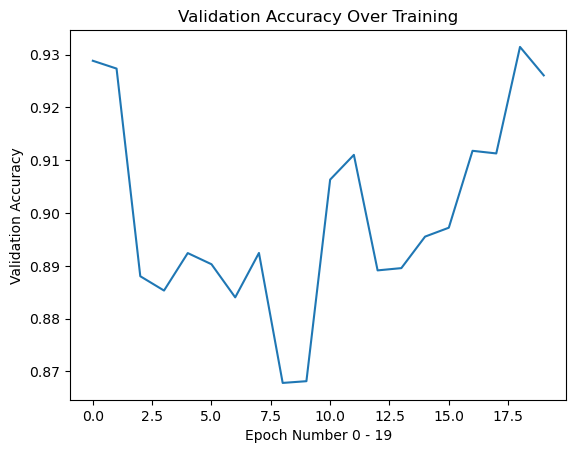

In [190]:
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch Number 0 - 19")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Training")

In [192]:
## Start around 0.31
## Goes slightly down
## end aroung 0.21
## Final validation loss - 0.21 is very good

Text(0.5, 1.0, 'Validation Loss Over Epochs')

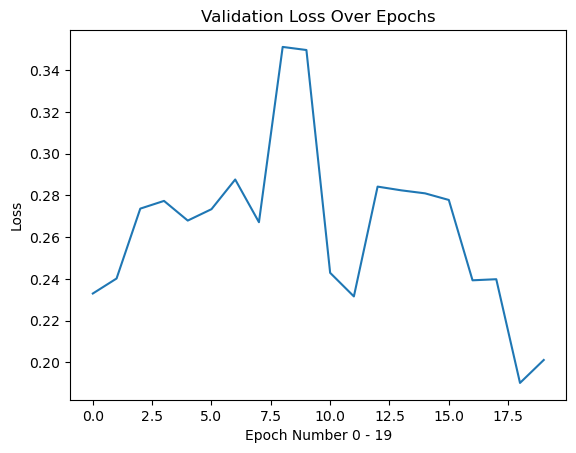

In [194]:
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch Number 0 - 19")
plt.ylabel("Loss")
plt.title("Validation Loss Over Epochs")

In [281]:
network.save("custom_ocr.keras")

# Load_Model

In [549]:
import cv2
from tensorflow.keras.models import load_model

In [551]:
loaded_network = load_model("custom_ocr.keras")
loaded_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,406 (1.58 MB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276,938 (1.06 MB)